# Evaluate Mispredictions

This notebook evaluates parses the results of the simulation and plots the number of mispredictions for each configuration. It also serves to reproduce the main results (Figure 9) in the paper.


In [ ]:

import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.ticker as mticker

## Loading and parsing the data

In [2]:

dict = {}



models = [

    ("tage64kscl-ae", "64K TSL"),
    ("tage512kscl-ae", "512K TSL"),
    ("llbp-timing-ae", "LLBP"),
    ("llbp-ae", "LLBP-0Lat"),

]

bms = [
    ('nodeapp-nodeapp', 'NodeApp'),
    ('mwnginxfpm-wiki', 'PHPWiki'),

    ('benchbase-tpcc', 'TPCC'),
    ('benchbase-twitter', 'Twitter'),
    ('benchbase-wikipedia', 'Wikipedia'),
    ('dacapo-kafka', 'Kafka'),
    ('dacapo-spring', 'Spring'),
    ('dacapo-tomcat', 'Tomcat'),
    ('renaissance-finagle-chirper', 'Chirper'),
    ('renaissance-finagle-http', 'HTTP'),

    ('charlie.1006518', 'Charlie'),
    ('delta.507252', 'Delta'),
    ('merced.467915', 'Merced'),
    ('whiskey.426708', 'Whiskey'),
]




dfall = pd.DataFrame()

# data = {}

for cfg, n in models:

    dftmp = pd.DataFrame()
    for bm,name in bms:

        with open(f"../results/{bm}/{cfg}.txt") as f:

            dict = { "Model" : n, "Benchmark" : name}


            for line in f:
                if "ROI INSTRUCTIONS" in line:
                    dict["Ninst"] = int(line.split()[-1])
                if "ROI MISPREDICTIONS" in line:
                    dict["Misp"] = int(line.split()[-1])
                if "ROI MPKI" in line:
                    dict["MPKI"] = float(line.split()[-1])


            dftmp = pd.concat([dftmp, pd.DataFrame(dict, index=[0])])

    print(n, len(dftmp))

    dm = {"Model": n, "Benchmark": "Mean" }
    for metric in dftmp.columns[2:]:
        dm[metric] = dftmp[metric].mean()

    dfall = pd.concat([dfall, dftmp, pd.DataFrame([dm])])



## Calculate MPKI reduction
dfall["MPKI Reduction"] = 0.0
ref = "64K TSL"

for bm in dfall["Benchmark"].unique():

    m = "misp"
    m = "MPKI"

    tage64ksc_mpki = dfall.loc[(dfall["Benchmark"] == bm) & (dfall["Model"] == ref), m].values[0]
    dfall.loc[dfall["Benchmark"] == bm, "MPKI Reduction"] = (tage64ksc_mpki - dfall.loc[dfall["Benchmark"] == bm, m]) / tage64ksc_mpki


64K TSL 14
512K TSL 14
LLBP 14
LLBP-0Lat 14


## Absolute MPKI

64K TSL
LLBP
LLBP-0Lat
512K TSL


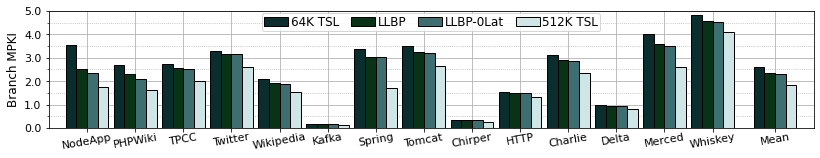

In [3]:


width = 0.7       # the width of the bars: can also be len(x) sequence


cw=11.5
fs=12

fig, axs = plt.subplots(1, 1, figsize=(cw,cw*0.2), sharex=True, sharey=False)

_bms = [b[1] for b in bms] + ["Mean"]

x = np.array([x_+0.3 if l in ["GMean", "Mean"] else x_ for x_,l in enumerate(_bms)])

colors = {
    '64K TSL' : '#0a2d2e',
    "512K TSL" : '#cfe5e6',
    "LLBP" : '#093316',
    "LLBP-0Lat" : '#3e6f70',
}


plot_models = [

    "64K TSL",
    "LLBP",
    "LLBP-0Lat",
    "512K TSL",
]


nbars = len(plot_models)
bar_width = float(1) / float(nbars+0.5)
init_offset = float(-nbars*bar_width) / 2
get_offset = lambda n : init_offset + n * bar_width


ax = axs

m = "MPKI"

for i, model in enumerate(plot_models):

    # if i == 0:
    #     continue


    print(model)
    dftmp = dfall[dfall["Model"] == model].set_index("Benchmark")

    y = dftmp.loc[_bms, m].values



    ax.bar(x+get_offset(i), y, width=bar_width, bottom=0, #hatch=hatches[j],
            color=colors[model], label=model,
            align='edge', edgecolor='k',zorder=2.3)





## Grid
ax.yaxis.set_minor_locator(mticker.AutoMinorLocator(2))
ax.grid(True, which='both')
ax.grid(True, which='minor', linestyle=':')

ax.set_ylabel("Branch MPKI", fontsize=fs)

_y = ax.get_yticks()
ax.set_yticks(_y)
ax.set_yticklabels([f"{y:.1f}" for y in _y], fontsize=fs-1)

# for container in ax.containers:
#     ax.bar_label(container, fontsize=7, fmt="%.2f", rotation=90)


## Format x-axis
ax.set_xticks(x)
ax.set_xticklabels(_bms, rotation=10, horizontalalignment="center", fontsize=fs-1)
ax.tick_params(axis='x', which='major', pad=0)

ax.set_ylim(bottom=-0.0, top=5)



handles, labels = ax.get_legend_handles_labels()

ax.legend(handles, labels, bbox_to_anchor=(0.5,1.03), loc="upper center", fontsize=fs, ncol=8,
            labelspacing=0.05, columnspacing=1.,handletextpad=0.2,borderpad=0.2,frameon=True)

# ax.legend(loc="best", fontsize="9", )
ax.set_xlim(left=x[0]-0.8, right=x[-1]+0.8)





fig.tight_layout()


fig.savefig("mpki.pdf",dpi=300,format="pdf",bbox_inches='tight', pad_inches=0, facecolor="w")
# fig.savefig("performance_study.png",dpi=300,bbox_inches='tight', pad_inches=0, facecolor="w")

## MPKI Reduction

LLBP
LLBP-0Lat
512K TSL


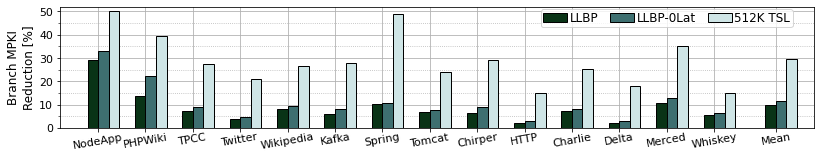

In [4]:


width = 0.7
cw=11.5
fs=12

fig, axs = plt.subplots(1, 1, figsize=(cw,cw*0.2), sharex=True, sharey=False)

_bms = [b[1] for b in bms] + ["Mean"]

x = np.array([x_+0.3 if l in ["GMean", "Mean"] else x_ for x_,l in enumerate(_bms)])

colors = {
    '64K TSL' : '#0a2d2e',
    "512K TSL" : '#cfe5e6',
    "LLBP" : '#093316',
    "LLBP-0Lat" : '#3e6f70',
}


plot_models = [
    "64K TSL",
    "LLBP",
    "LLBP-0Lat",
    "512K TSL",
]


nbars = len(plot_models)
bar_width = float(1) / float(nbars+0.5)
init_offset = float(-nbars*bar_width) / 2
get_offset = lambda n : init_offset + n * bar_width





ax = axs

m = "MPKI Reduction"

for i, model in enumerate(plot_models):

    if i == 0:
        continue


    print(model)
    dftmp = dfall[dfall["Model"] == model].set_index("Benchmark")

    y = dftmp.loc[_bms, m].values



    ax.bar(x+get_offset(i), y, width=bar_width, bottom=0, #hatch=hatches[j],
            color=colors[model], label=model,
            align='edge', edgecolor='k',zorder=2.3)





## Grid
ax.yaxis.set_minor_locator(mticker.AutoMinorLocator(2))
ax.grid(True, which='both')
ax.grid(True, which='minor', linestyle=':')

ax.set_ylabel("Branch MPKI\nReduction [%]", fontsize=fs)

_y = ax.get_yticks()
ax.set_yticks(_y)
ax.set_yticklabels([f"{y*100:.0f}" for y in _y], fontsize=fs-1)

# for container in ax.containers:
#     ax.bar_label(container, fontsize=7, fmt="%.3f", rotation=90)


## Format x-axis
ax.set_xticks(x)
ax.set_xticklabels(_bms, rotation=10, horizontalalignment="center", fontsize=fs-1)
ax.tick_params(axis='x', which='major', pad=0)

ax.set_ylim(bottom=-0.0, top=0.52)



handles, labels = ax.get_legend_handles_labels()

ax.legend(handles, labels, bbox_to_anchor=(0.98,1.03), loc="upper right", fontsize=fs, ncol=8,
            labelspacing=0.05, columnspacing=1.,handletextpad=0.2,borderpad=0.2,frameon=True)

ax.set_xlim(left=x[0]-0.8, right=x[-1]+0.8)





fig.tight_layout()


fig.savefig("mpki_reduction.pdf",dpi=300,format="pdf",bbox_inches='tight', pad_inches=0, facecolor="w")

In [1]:
# 计算每个模型中Branch MPKI Reduction [%]的平均值
model_mpki_reduction_avg = dfall.groupby("Model")["MPKI Reduction"].mean()

# 打印每个模型中Branch MPKI Reduction [%]的平均值
print(model_mpki_reduction_avg)

NameError: name 'dfall' is not defined